In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

### Notes from viz lectures

### Simplification
* Figure out consolidation schemes--ratios might be useful for rxtr params
* Exclude or dim unimportant data

### Headings for training set viz
* Goal for i.i.d. training set accomplished / not accomplished
* Certain locations in training set space difficult to predict OR error higher in certain locations in training set space
* Natural uranium not reliably predicted by any algorithm
* Complex models predict x parameters better than simple models (or vice versa)

# Scoring Visualizations

## Low burnup data set
### MAE and RMSE

In [3]:
low_rxtr_scr = pd.read_csv('../results/21jul2018/trainset_1_fissact_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
low_burn_scr = pd.read_csv('../results/21jul2018/trainset_1_fissact_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
low_enri_scr = pd.read_csv('../results/21jul2018/trainset_1_fissact_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
low_cool_scr = pd.read_csv('../results/21jul2018/trainset_1_fissact_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

mae = 'test_neg_mean_absolute_error'
alg = 'algorithm'

In [4]:
#low_cool.loc[low_cool[alg]=='knn']
low_burn_scr.head()

,CV_fold,fit_time,score_time,test_explained_variance,test_neg_mean_absolute_error,algorithm
0,0,0.003388,0.012032,0.999973,-8.019409,knn
1,1,0.003313,0.011503,0.999956,-7.939545,knn
2,2,0.003336,0.011704,0.999967,-7.611162,knn
3,3,0.003287,0.011838,0.999974,-7.214527,knn
4,4,0.003224,0.011794,0.999926,-14.549559,knn


In [4]:
low_burn = low_burn_scr.loc[:, [alg, mae]]
low_cool = low_cool_scr.loc[:, [alg, mae]]
low_enri = low_enri_scr.loc[:, [alg, mae]]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1367: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listli

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2787: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5



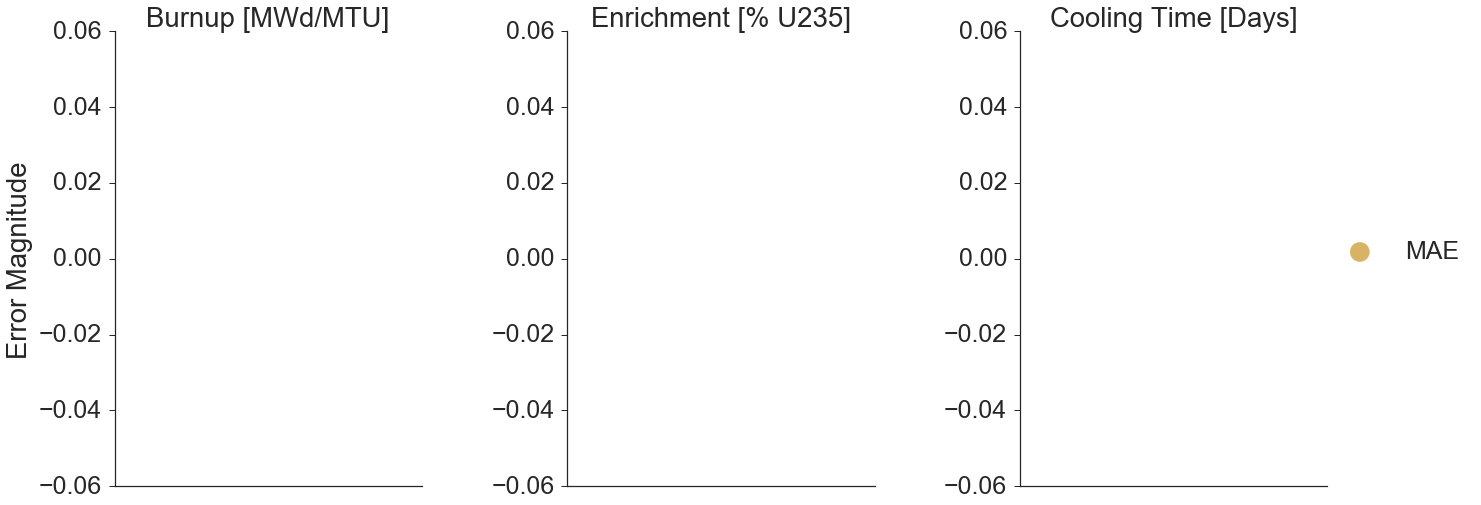

In [5]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

low_burn['Parameter'] = 'Burnup [MWd/MTU]'
low_enri['Parameter'] = 'Enrichment [% U235]'
low_cool['Parameter'] = 'Cooling Time [Days]'

err = pd.DataFrame()
err = pd.concat([low_burn, low_enri, low_cool])
err['MAE'] = -1 * err[mae]

err = err.melt(id_vars = [alg, 'Parameter'], 
               value_vars = ['MAE',], 
               value_name='Error Magnitude', var_name='Error')

mer = sns.factorplot(x="algorithm", y='Error Magnitude',
                     hue='Error', col="Parameter", ci=95,
                     sharey=False, s=15, legend=False,
                     palette=sns.color_palette(med), 
                     data=err, kind="swarm", size=8, aspect=.8)

(mer.set_axis_labels("", "Error Magnitude")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .add_legend(markerscale=2.5))
#mer.axes[0,0].set_ylim(0, 5300)
#mer.axes[0,1].set_ylim(0, 0.75)
#mer.axes[0,2].set_ylim(0, 450)
#mer.savefig('../results/21jul2018/graphs/1error-compare.png', bbox_inches='tight', transparent=True)

## SFCOMPO data set
### MAE and RMSE

In [7]:
rxtr_scr = pd.read_csv('../results/21jul2018/trainset_2_fissact_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
burn_scr = pd.read_csv('../results/21jul2018/trainset_2_fissact_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
enri_scr = pd.read_csv('../results/21jul2018/trainset_2_fissact_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
cool_scr = pd.read_csv('../results/21jul2018/trainset_2_fissact_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

mae = 'test_neg_mean_absolute_error'
alg = 'algorithm'

burn = burn_scr.loc[:, [alg, mae]]
cool = cool_scr.loc[:, [alg, mae]]
enri = enri_scr.loc[:, [alg, mae]]

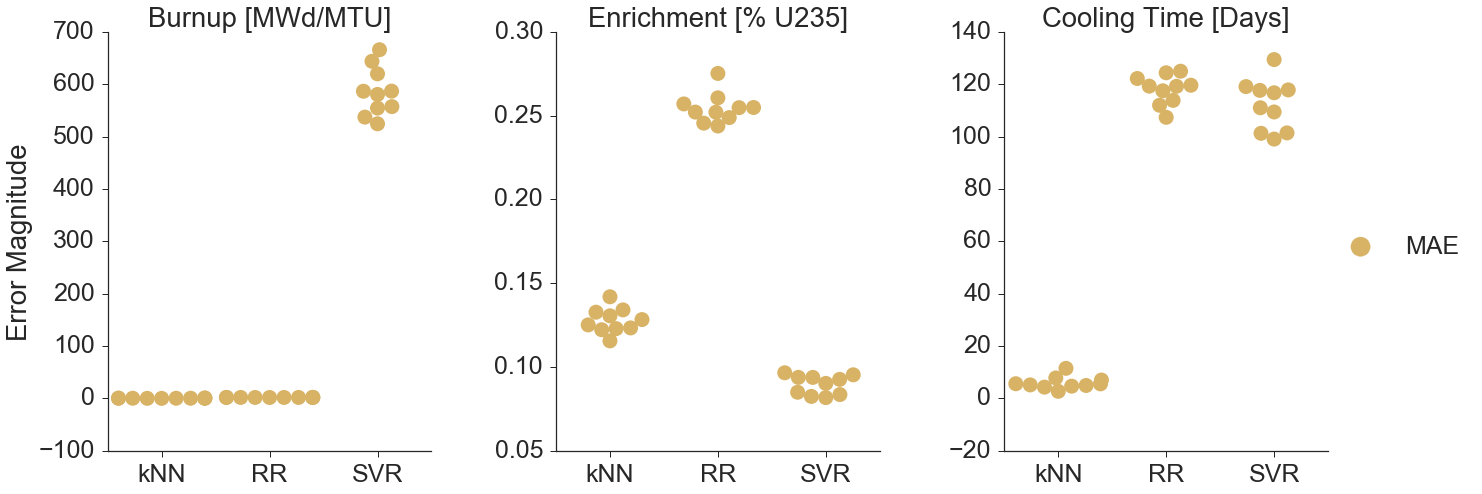

In [8]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

burn['Parameter'] = 'Burnup [MWd/MTU]'
enri['Parameter'] = 'Enrichment [% U235]'
cool['Parameter'] = 'Cooling Time [Days]'

err = pd.DataFrame()
err = pd.concat([burn, enri, cool])
err['MAE'] = -1 * err[mae]
#err['RMSE'] = -1 * err[rmse]

err = err.melt(id_vars = [alg, 'Parameter'], 
               value_vars = ['MAE',], 
               value_name='Error Magnitude', var_name='Error')

mer = sns.factorplot(x="algorithm", y='Error Magnitude',
                     hue='Error', col="Parameter", ci=95,
                     sharey=False, s=15, legend=False,
                     palette=sns.color_palette(med), 
                     data=err, kind="swarm", size=8, aspect=.8)

(mer.set_axis_labels("", "Error Magnitude")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .add_legend(markerscale=2.5))
#mer.axes[0,0].set_ylim(0, 5300)
#mer.axes[0,1].set_ylim(0, 0.75)
#mer.axes[0,2].set_ylim(0, 450)
#mer.savefig('../results/21jul2018/graphs/2error-compare.png', bbox_inches='tight', transparent=True)

### Variance

In [9]:
var = 'test_explained_variance'
acc = 'test_accuracy'

In [10]:
low_burn = low_burn_scr.loc[:, [alg, var]]
low_cool = low_cool_scr.loc[:, [alg, var]]
low_enri = low_enri_scr.loc[:, [alg, var]]
low_rxtr = low_rxtr_scr.loc[:, [alg, acc]]

burn = burn_scr.loc[:, [alg, var]]
cool = cool_scr.loc[:, [alg, var]]
enri = enri_scr.loc[:, [alg, var]]
rxtr = rxtr_scr.loc[:, [alg, acc]]

low_burn['Score'] = low_burn[var]
low_cool['Score'] = low_cool[var]
low_enri['Score'] = low_enri[var]
low_rxtr['Score'] = low_rxtr[acc]

burn['Score'] = burn[var]
cool['Score'] = cool[var]
enri['Score'] = enri[var]
rxtr['Score'] = rxtr[acc]

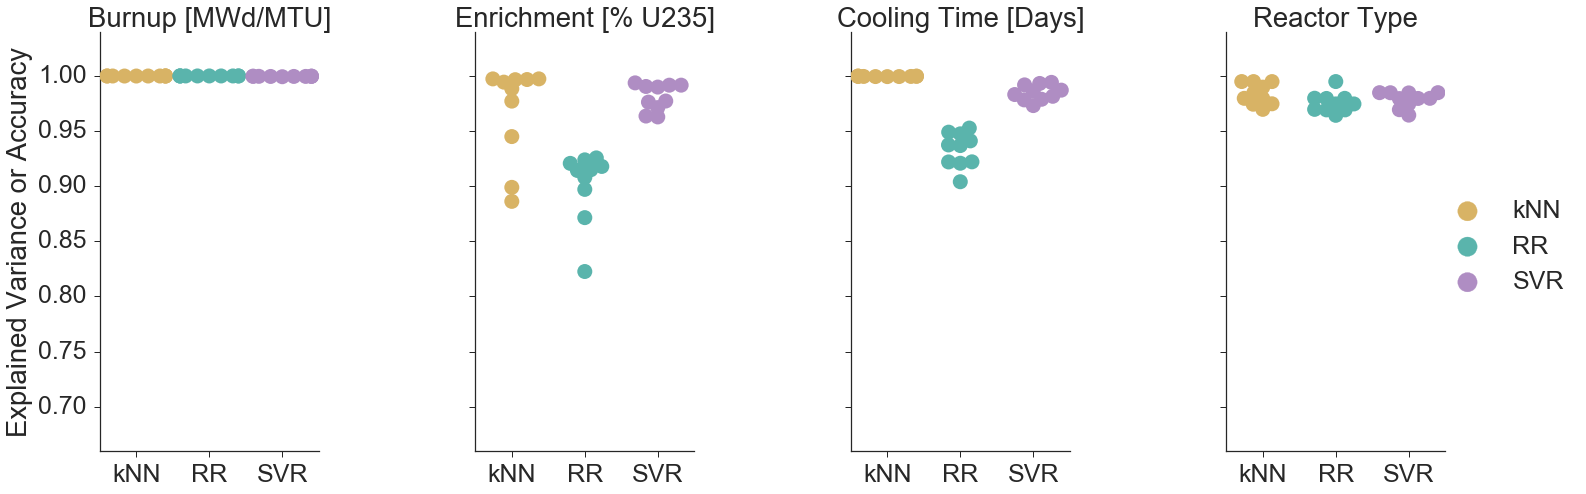

In [11]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

low_burn['Parameter'] = 'Burnup [MWd/MTU]'
low_enri['Parameter'] = 'Enrichment [% U235]'
low_cool['Parameter'] = 'Cooling Time [Days]'
low_rxtr['Parameter'] = 'Reactor Type'

scr = pd.DataFrame()
scr = pd.concat([low_burn, low_enri, low_cool, low_rxtr])

var = sns.factorplot(x=alg, y="Score",
                     hue=alg, col="Parameter",
                     s=15, legend=False, ci=95, 
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, aspect=.65)

(var.set_axis_labels("", "Explained Variance or Accuracy")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .set(ylim=(0.66, 1.04))
    .add_legend(markerscale=2.5))
new_labels = ['kNN', 'RR', 'SVR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
var.savefig('../results/21jul2018/graphs/1variance.png', bbox_inches='tight', transparent=True)

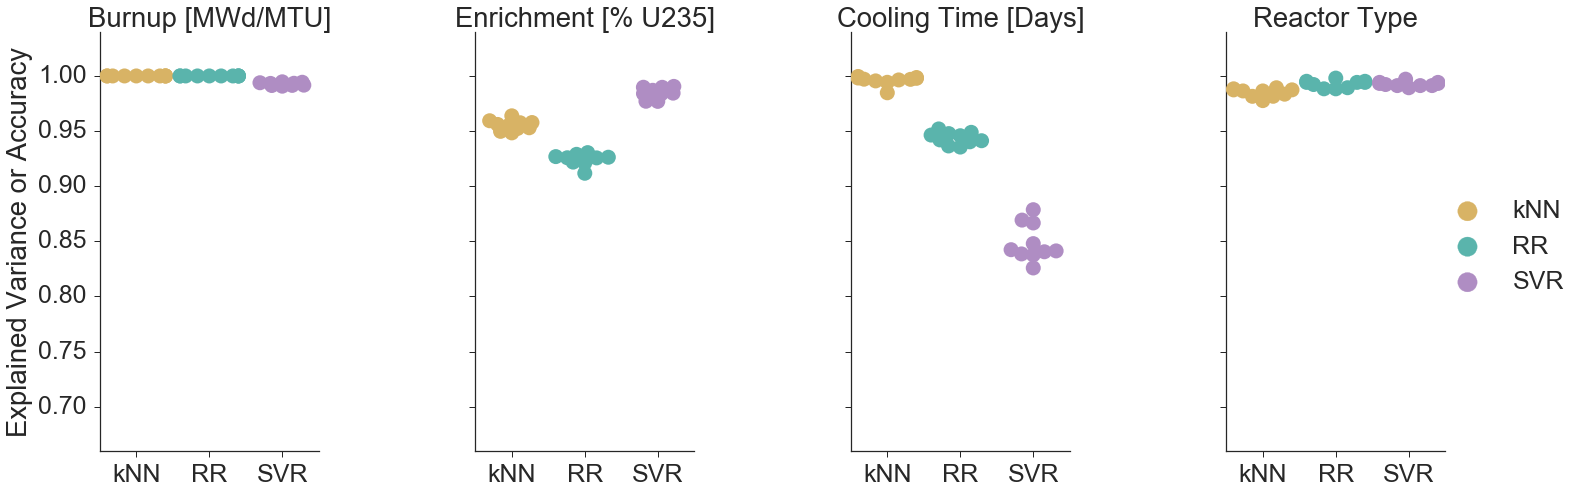

In [12]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

burn['Parameter'] = 'Burnup [MWd/MTU]'
enri['Parameter'] = 'Enrichment [% U235]'
cool['Parameter'] = 'Cooling Time [Days]'
rxtr['Parameter'] = 'Reactor Type'

scr = pd.DataFrame()
scr = pd.concat([burn, enri, cool, rxtr])

var = sns.factorplot(x=alg, y="Score",
                     hue=alg, col="Parameter",
                     s=15, legend=False, ci=95, 
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, aspect=.65)

(var.set_axis_labels("", "Explained Variance or Accuracy")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .set(ylim=(0.66, 1.04))
    .add_legend(markerscale=2.5))
new_labels = ['kNN', 'RR', 'SVR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
var.savefig('../results/21jul2018/graphs/2variance.png', bbox_inches='tight', transparent=True)